# Introduction

Airbnb is a home-sharing platform that allows home-owners and renters ('hosts') to put their properties ('listings') online, so that guests can pay to stay in them. Hosts are expected to set their own prices for their listings. Although Airbnb and other sites provide some general guidance, there are currently no free services which help hosts price their properties. Paid third party pricing software is available, but generally you are required to put in your own expected average price ('base price'), and the algorithm will vary the daily price around that base price on each day depending on day of the week, seasonality, how far away the date is, and other factors.

Airbnb pricing is important to get right, particularly in big cities like New York City, Los Angeles etc., where there's lots of competition and even small differences in prices can make the difference between optimum occupancy and high earnings, or being priced out of the market. It is also a difficult thing to do correctly, in order to balance the price with occupancy (which varies inversely with price) in order to maximise revenue.

This project aims to use machine learning and deep learning to predict the base price for properties in some of the major cities in the US(SF, NYC, DC, LA, Boston, Chicago).

# Business Aspect

The business problem that we are dealing with is to get insights of what variables impact the house prices and be able to predict the house prices as accurately as possible,which leads to drive many business decisions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import statistics as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
train_data = pd.read_csv(r'C:\Users\ck\Downloads\yaswanth downloads\case study\train.csv')
test_data = pd.read_excel(r'C:\Users\ck\Downloads\yaswanth downloads\case study\test.xlsx')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [4]:
#shape of train data and test data
print(f'Training data has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'Test data has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

Training data has 49999 rows and 30 columns
Test data has 24111 rows and 29 columns


In [5]:
#checking for duplicate rows in the train data
duplicate_rows_df = train_data[train_data.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 30)


There are no duplicate values in our train data

In [6]:
train_data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', ' '],
      dtype='object')

In [7]:
#finding missing values count and the corresponding percentage in the training data
missing_count=(train_data).isnull().sum().sort_values(ascending=False)
missing_percentage=(train_data).isnull().sum().sort_values(ascending=False)/len((train_data))
pd.concat([missing_count,missing_percentage],axis=1,keys=['missing_count','missing_percentage'])

missing_count  missing_percentage
                                49999            1.000000
host_response_rate              12338            0.246765
review_scores_rating            11301            0.226025
first_review                    10711            0.214224
last_review                     10683            0.213664
thumbnail_url                    5595            0.111902
neighbourhood                    4617            0.092342
zipcode                           640            0.012800
bathrooms                         146            0.002920
host_identity_verified            127            0.002540
host_has_profile_pic              127            0.002540
host_since                        127            0.002540
beds                               91            0.001820
bedrooms                           62            0.001240
instant_bookable                    0            0.000000
cancellation_policy                 0            0.000000
property_type                       0            0.000000
room_type                           0            0.000000
amenities                           0            0.000000
accommodates                        0            0.000000
number_of_reviews                   0            0.000000
bed_type                            0            0.000000
cleaning_fee                        0            0.000000
latitude                            0            0.000000
city                                0            0.000000
description                         0            0.000000
name                                0            0.000000
longitude                           0            0.000000
log_price                           0            0.000000
id                                  0            0.000000

There is a column with no name and filled completely with null values.Let's remove it

In [8]:
train_data.drop([' '],axis=1,inplace=True)

Since the feature is dropped from training data , let's remove it from test data as well

In [9]:
 test_data.drop([' '],axis=1,inplace=True)

In [10]:
#finding missing values count and the corresponding percentage in the test data
missing_count=(test_data).isnull().sum().sort_values(ascending=False)
missing_percentage=(test_data).isnull().sum().sort_values(ascending=False)/len((test_data))
pd.concat([missing_count,missing_percentage],axis=1,keys=['missing_count','missing_percentage'])

missing_count  missing_percentage
host_response_rate               5961            0.247232
review_scores_rating             5421            0.224835
first_review                     5153            0.213720
last_review                      5144            0.213347
thumbnail_url                    2621            0.108706
neighbourhood                    2255            0.093526
zipcode                           326            0.013521
host_identity_verified             61            0.002530
host_since                         61            0.002530
host_has_profile_pic               61            0.002530
bathrooms                          54            0.002240
beds                               40            0.001659
bedrooms                           29            0.001203
name                                4            0.000166
description                         1            0.000041
instant_bookable                    0            0.000000
latitude                            0            0.000000
longitude                           0            0.000000
city                                0            0.000000
cleaning_fee                        0            0.000000
cancellation_policy                 0            0.000000
bed_type                            0            0.000000
number_of_reviews                   0            0.000000
accommodates                        0            0.000000
amenities                           0            0.000000
room_type                           0            0.000000
property_type                       0            0.000000
id                                  0            0.000000

Since the features for training data and test data must be same,lets combine the training data and test data so that the data pre-processing part can be done simultaneously for both the training data and test data

In [11]:
#creating the response column for test set and filling it with null values()
test_data['log_price']=np.nan

In [12]:
#creating a column 'data' and assiging value 'train' for training data and 'test' for test data
train_data['data']='train'
test_data['data']='test'

In [13]:
#combining both train data and test data
combined_data=pd.concat([train_data,test_data],axis=0,sort=False)

In [14]:
combined_data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'log_price', 'data'],
      dtype='object')

let's explore the data

In [15]:
train_data.describe()

id  accommodates     bathrooms      latitude     longitude  \
count  4.999900e+04  49999.000000  49853.000000  49999.000000  49999.000000   
mean   1.125866e+07      3.157563      1.235151     38.440220    -92.446264   
std    6.086302e+06      2.165059      0.582082      3.082650     21.719824   
min    3.440000e+02      1.000000      0.000000     33.338905   -122.511500   
25%    6.245858e+06      2.000000      1.000000     34.124873   -118.343090   
50%    1.225244e+07      2.000000      1.000000     40.662201    -76.997679   
75%    1.641108e+07      4.000000      1.000000     40.745985    -73.954598   
max    2.122836e+07     16.000000      8.000000     42.390437    -70.985047   

       number_of_reviews  review_scores_rating      bedrooms          beds  \
count       49999.000000          38698.000000  49937.000000  49908.000000   
mean           21.000380             94.055972      1.266776      1.712431   
std            38.131564              7.870579      0.853917      1.259860   
min             0.000000             20.000000      0.000000      0.000000   
25%             1.000000             92.000000      1.000000      1.000000   
50%             6.000000             96.000000      1.000000      1.000000   
75%            24.000000            100.000000      1.000000      2.000000   
max           605.000000            100.000000     10.000000     16.000000   

          log_price  
count  49999.000000  
mean       4.781831  
std        0.716910  
min        1.609438  
25%        4.317488  
50%        4.709530  
75%        5.220356  
max        7.600402

Let's first see how our target variable is distributed

count    49999.000000
mean         4.781831
std          0.716910
min          1.609438
25%          4.317488
50%          4.709530
75%          5.220356
max          7.600402
Name: log_price, dtype: float64


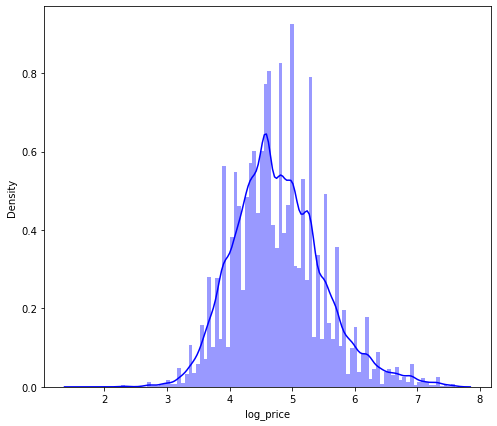

In [16]:
 #plotting the distribution plot of target variable 'log_price'
print(train_data['log_price'].describe())
plt.figure(figsize=(8, 7))
sns.distplot(train_data['log_price'], color='b', bins=100, hist_kws={'alpha': 0.4});

Fortunately our target variable is almost normally distibuted.So there is no need of appying any tranformations to it

In [17]:
combined_data.dtypes

id                          int64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
log_price                 float64
data          

Let's explore the numeric features first

Note: For exploring the data only training data is used

# Exploring numeric features

In [18]:
#selecting columns that are numeric
combined_data.select_dtypes(['int64','float64']).columns

Index(['id', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'log_price'],
      dtype='object')

In [19]:
train_data['id'].nunique()

49999

ID is merely a unique identifier for each record/observation. Including this in model doesn't make sense

In [20]:
#frequency of each number
train_data['accommodates'].value_counts()

2     21529
4      8178
1      6360
3      5213
6      3331
5      2304
8      1199
7       640
10      472
16      210
12      190
9       183
14       77
11       51
15       38
13       24
Name: accommodates, dtype: int64

Although 'acccommodates' is a numeric feature the values are discrete

<AxesSubplot:xlabel='accommodates', ylabel='count'>

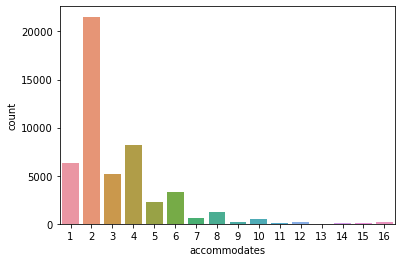

In [21]:
#plotting frequency plot of accommodates
sns.countplot(x=train_data['accommodates'])

A majority houses has only 2 accommodates

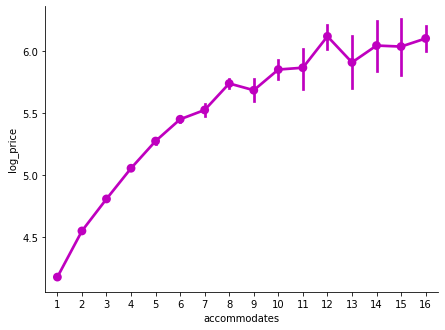

In [22]:
sns.factorplot('accommodates', 'log_price', data = train_data, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

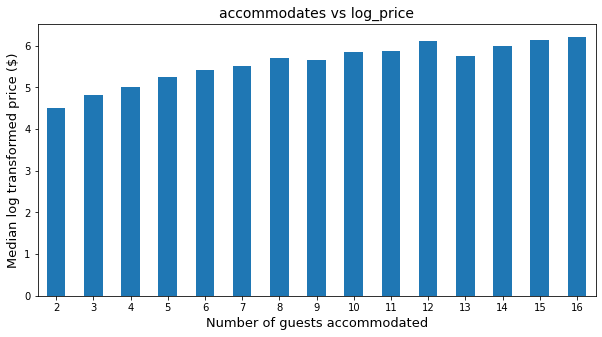

In [23]:
plt.figure(figsize=(10,5))
train_data.groupby('accommodates').log_price.median().plot(kind='bar')
plt.title('accommodates vs log_price', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median log transformed price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

In [24]:
#plotting scatterplot of 'accommodates' and 'log_price'
#sns.scatterplot(x=train_data['accommodates'],y=train_data['log_price'])

From the above box plot and scatter plot we can conclude that majority of the accommodates are 2 and there is no strong positive relationship between accommodates and log_price.

In [25]:
#cheching for null values in 'accommodates'
combined_data['accommodates'].isnull().sum()

0

In [26]:
#frequency count of 'bathrooms'
train_data['bathrooms'].value_counts()

1.0    39136
2.0     5384
1.5     2619
2.5     1033
3.0      705
3.5      288
4.0      193
0.5      148
0.0      132
4.5       74
5.0       50
8.0       31
5.5       28
6.0       15
6.5        8
7.0        5
7.5        4
Name: bathrooms, dtype: int64

Similar to 'accommodates', 'bathrooms' also have descrete values

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

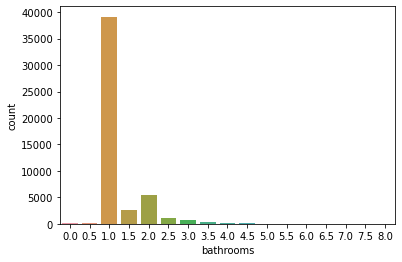

In [27]:
#plotting frequency plot of bathrooms
sns.countplot(x=train_data['bathrooms'])

A major chunk of houses has 1 bathroom

<AxesSubplot:xlabel='bathrooms', ylabel='log_price'>

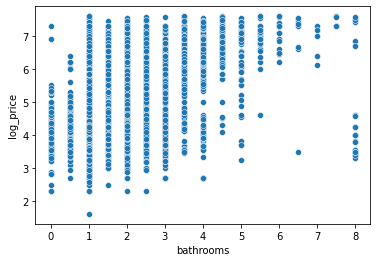

In [28]:
#plotting scatterplot of 'bathrooms' and 'log_price'
sns.scatterplot(x=train_data['bathrooms'],y=train_data['log_price'])

In [29]:
#checing for null values in 'bathrooms'
combined_data['bathrooms'].isnull().sum()

200

In [30]:
print(train_data['bathrooms'].isnull().sum())
print(test_data['bathrooms'].isnull().sum())


146
54


There are 146 missing values of 'bathrooms' in training data and 54 missing values in test data.Lets impute the missing values

In [31]:
#mode of 'bathrooms' from training data
train_data['bathrooms'].value_counts().axes[0][0]

1.0

In [32]:
#Replacing the null values of 'bathrooms' in both train data and test data with the mode of 'bathrooms' of train data
combined_data['bathrooms'].fillna(train_data['bathrooms'].value_counts().axes[0][0], inplace=True)

Here the missing values of 'bathrooms' from both training data and test data are replaced by the mode of it from training data because it is likely that we don't have the entire test data at a time.There may be a single instance(single observation) of the test data for which we have to predict the value.In such case if any of the features of that single record are missing the only  choice of filling the missing values would be to use the training data's statistical measures(mean/median/mode)

It is a general business principle that the farther the house is from the centre of the city lesser it's price is. So based on this let's create a feature by calculating the distance from the city centre to the location of the house

In [33]:
City = ['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF']
lat = [37.78, 42.36, 41.88, 38.91, 40.72, 34.06]
long = [-122.42, -71.08, -87.63, -77.04, -74.00, -118.25]

def lat_center(row):
    for i in range(0,6):
        if (row['city']==City[i]):
            return lat[i]
    
def long_center(row):
    for i in range(0,6):
        if (row['city']==City[i]):
            return long[i]


In [34]:
#creating columns lat_centre and long_centre
combined_data['lat_center'] = combined_data.apply(lambda row: lat_center(row), axis=1)
combined_data['long_center'] = combined_data.apply(lambda row: long_center(row), axis=1)

In [35]:
#calculating the distance from centre
combined_data['distance_to_center']=np.sqrt((combined_data['lat_center']-combined_data['latitude'])**2 +
                                            (combined_data['long_center']-combined_data['longitude'])**2)

In [36]:
combined_data.drop(['latitude', 'longitude', 'lat_center', 'long_center'], axis = 1, inplace = True)

In [37]:
train_data['number_of_reviews'].value_counts()

0      10678
1       4782
2       3224
3       2474
4       1926
5       1701
6       1374
7       1206
8       1139
9        985
10       891
11       787
12       714
13       672
14       645
15       618
16       549
18       540
17       491
19       447
21       441
20       432
23       399
24       379
22       377
26       351
25       348
28       311
27       301
31       300
29       288
32       272
35       245
33       244
36       244
30       242
34       213
38       209
41       209
39       198
37       197
40       192
44       175
45       164
43       163
42       161
47       159
48       158
46       157
49       151
50       142
55       140
51       135
58       134
56       130
57       128
52       128
54       125
53       113
60       109
61       109
66       109
67       108
69       104
71       101
59       101
62        99
63        97
65        95
64        92
70        89
74        88
68        87
78        80
75        77
76        75
73        74

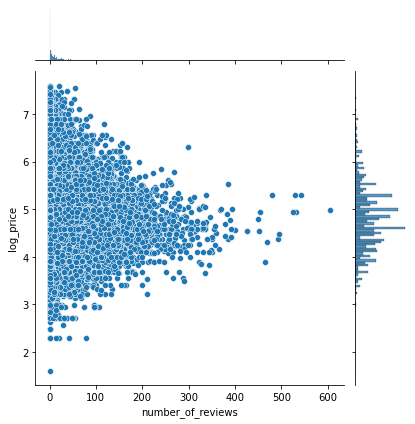

In [38]:
#plotting scatterplot of 'number_of_reviews' and 'log_price'
sns.jointplot(x=train_data['number_of_reviews'],y=train_data['log_price'])

We can infer that the houses with higher reviews are centred around the mean of log_price.Also the houses with less number of reviews have all the ranges of log_price

In [39]:
#checking for null values in the feature 'number_of_reviews'
combined_data['number_of_reviews'].isnull().sum()

0

In [40]:
train_data['review_scores_rating'].value_counts()

100.0    10934
98.0      2924
97.0      2807
96.0      2752
95.0      2495
93.0      2454
90.0      1907
99.0      1796
94.0      1710
80.0      1469
92.0      1398
91.0      1093
89.0       755
88.0       749
87.0       732
85.0       428
86.0       349
60.0       313
84.0       291
83.0       265
70.0       148
82.0       137
73.0       112
81.0        79
75.0        66
40.0        66
20.0        64
78.0        56
79.0        53
77.0        50
76.0        48
67.0        42
74.0        27
72.0        23
65.0        21
50.0        20
68.0        12
71.0        11
53.0         8
69.0         7
64.0         7
66.0         3
63.0         3
27.0         2
47.0         2
62.0         2
57.0         2
58.0         1
49.0         1
54.0         1
35.0         1
55.0         1
30.0         1
Name: review_scores_rating, dtype: int64

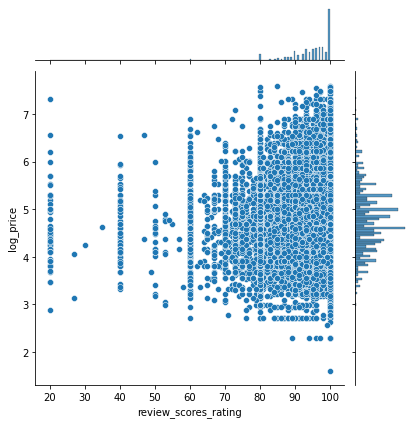

In [41]:
#plotting scatterplot of 'review_scores_rating' and 'log_price'
sns.jointplot(x=train_data['review_scores_rating'],y=train_data['log_price'])

Majority of houses has review_scores_rating above 80.But a higher review_scores_rating is not guaranteeing a higher log_price as houses with higher review_scores_rating has log_price value ranging from as low as 2 and as high as 7

In [42]:
#checking for missing values
combined_data['review_scores_rating'].isnull().sum()

16722

In [43]:
#checking for missing values in train and test data
print(train_data['review_scores_rating'].isnull().sum())
print(test_data['review_scores_rating'].isnull().sum())

11301
5421


In [44]:
#replacing the missing values of review_scores_rating in train and test data by the mean of review_scores_rating from train data
combined_data['review_scores_rating'].fillna(int(train_data['review_scores_rating'].mean()),inplace=True)

In [45]:
train_data['bedrooms'].value_counts()

1.0     33543
2.0      7678
0.0      4542
3.0      2910
4.0       901
5.0       234
6.0        84
7.0        27
10.0        7
8.0         6
9.0         5
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

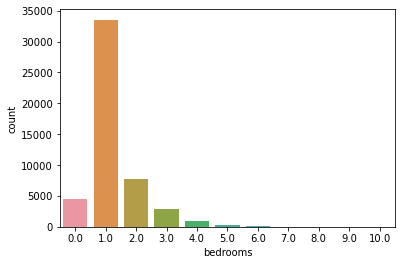

In [46]:
#plotting frequency plot of bedrooms
sns.countplot(x=train_data['bedrooms'])

More than half of the houses have a single bedroom

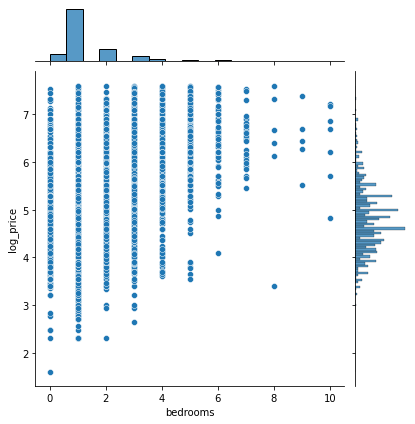

In [47]:
#plotting scatterplot of 'bedrooms' and 'log_price'
sns.jointplot(x=train_data['bedrooms'],y=train_data['log_price'])

<AxesSubplot:xlabel='bedrooms', ylabel='log_price'>

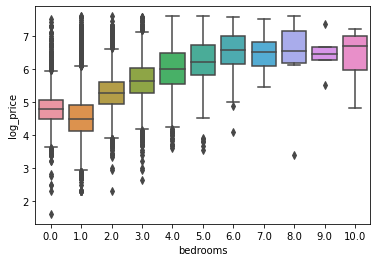

In [48]:
sns.boxplot(x=train_data['bedrooms'],y=train_data['log_price'])

We can see an increase in the log_price as the number of bedrooms increase from 1 to 6

In [49]:
combined_data['bedrooms'].isnull().sum()

91

In [50]:
#checking for missing values in train and test data
print(train_data['bedrooms'].isnull().sum())
print(test_data['bedrooms'].isnull().sum())

62
29


In [51]:
#replacing the missing values of review_scores_rating in train and test data by the mean of bedrooms from train data
combined_data['bedrooms'].fillna(int(train_data['bedrooms'].mean()),inplace=True)

In [52]:
train_data['beds'].value_counts()

1.0     30420
2.0     11354
3.0      4294
4.0      2039
5.0       888
6.0       442
7.0       139
8.0       134
10.0       64
9.0        52
12.0       23
16.0       23
11.0       17
13.0        7
15.0        5
14.0        4
0.0         3
Name: beds, dtype: int64

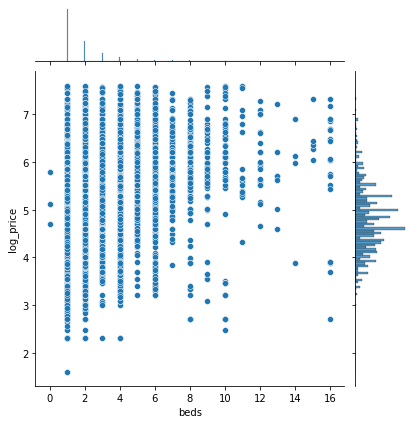

In [53]:
#plotting scatterplot of 'beds' and 'log_price'
sns.jointplot(x=train_data['beds'],y=train_data['log_price'])


The scatter plots of bedrooms vs log_price and beds vs log_price are similar.Hence we could infer that they have similar impact on the log_price

<AxesSubplot:xlabel='bedrooms', ylabel='beds'>

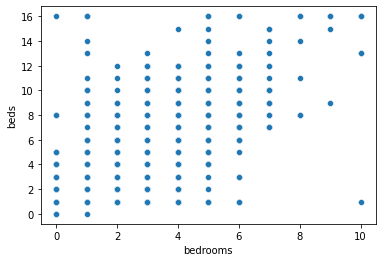

In [54]:
# The relationship btw `bedrooms` and `beds`
sns.scatterplot(train_data["bedrooms"], train_data["beds"])

<AxesSubplot:xlabel='beds', ylabel='log_price'>

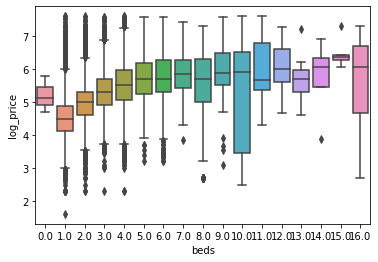

In [55]:
sns.boxplot(x=train_data['beds'],y=train_data['log_price'])

Just like that of with bedrooms there is an increase in log_price as the number of beds increase from 1 to 7

In [56]:
combined_data['beds'].isnull().sum()

131

In [57]:
#checking for missing values in train and test data
print(train_data['beds'].isnull().sum())
print(test_data['beds'].isnull().sum())

91
40


In [58]:
#replacing the missing values of review_scores_rating in train and test data by the mean of beds from train data
combined_data['beds'].fillna(int(train_data['beds'].mean()),inplace=True)

In [59]:
combined_data.head(3)

id property_type        room_type  \
0  6901257     Apartment  Entire home/apt   
1  6304928     Apartment  Entire home/apt   
2  7919400     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  Real Bed              strict          True  NYC   
1  Real Bed              strict          True  NYC   
2  Real Bed            moderate          True  NYC   

                                         description first_review  \
0  Beautiful, sunlit brownstone 1-bedroom in the ...    6/18/2016   
1  Enjoy travelling during your stay in Manhattan...     8/5/2017   
2  The Oasis comes complete with a full backyard ...    4/30/2017   

  host_has_profile_pic host_identity_verified host_response_rate  host_since  \
0                    t                      t                NaN   3/26/2012   
1                    t                      f               100%   6/19/2017   
2                    t                      t               100%  10/25/2016   

  instant_bookable last_review                                      name  \
0                f   7/18/2016            Beautiful brownstone 1-bedroom   
1                t   9/23/2017  Superb 3BR Apt Located Near Times Square   
2                t   9/14/2017                          The Garden Oasis   

      neighbourhood  number_of_reviews  review_scores_rating  \
0  Brooklyn Heights                  2                 100.0   
1    Hell's Kitchen                  6                  93.0   
2            Harlem                 10                  92.0   

                                       thumbnail_url zipcode  bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...   11201       1.0   1.0   
1  https://a0.muscache.com/im/pictures/348a55fe-4...   10019       3.0   3.0   
2  https://a0.muscache.com/im/pictures/6fae5362-9...   10027       1.0   3.0   

   log_price   data  distance_to_center  
0   5.010635  train            0.024928  
1   5.129899  train            0.047400  
2   4.976734  train            0.104531

# Exploring categorical features

In [60]:
#selecting columns that are categorical
combined_data.select_dtypes(['object','bool']).columns

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'name', 'neighbourhood', 'thumbnail_url', 'zipcode', 'data'],
      dtype='object')

NLP will not be used in the creation of an initial model (although they could be used to augment the model later, e.g. through sentiment analysis). Therefore, free text columns will be dropped for now, as well as other columns which are not useful for predicting price (e.g. url, host name and other host-related features that are unrelated to the property).

In [61]:
combined_data.drop(['description','host_response_rate','thumbnail_url','name'],axis=1,inplace=True)

In [62]:
combined_data['host_has_profile_pic'].value_counts()

t    73696
f      226
Name: host_has_profile_pic, dtype: int64

In [63]:
combined_data['host_has_profile_pic'] = np.where(combined_data['host_has_profile_pic']=='t',1,0)

In [64]:
combined_data['host_identity_verified'].value_counts()

t    49748
f    24174
Name: host_identity_verified, dtype: int64

In [65]:
combined_data['host_identity_verified'] = np.where(combined_data['host_identity_verified']=='t',1,0)

host_since

This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (assuming June 19, 2018)

In [66]:
import time
from datetime import datetime
# Converting to datetime
combined_data.host_since = pd.to_datetime(combined_data.host_since) 

# Calculating the number of days
combined_data['host_days_active'] = (datetime(2018, 6, 19) - combined_data.host_since).astype('timedelta64[D]')

In [67]:
# Replacing null values with the median
combined_data.host_days_active.fillna(combined_data.host_days_active.median(), inplace=True)

In [68]:
combined_data.head(2)

id property_type        room_type  \
0  6901257     Apartment  Entire home/apt   
1  6304928     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   

   bed_type cancellation_policy  cleaning_fee city first_review  \
0  Real Bed              strict          True  NYC    6/18/2016   
1  Real Bed              strict          True  NYC     8/5/2017   

   host_has_profile_pic  host_identity_verified host_since instant_bookable  \
0                     1                       1 2012-03-26                f   
1                     1                       0 2017-06-19                t   

  last_review     neighbourhood  number_of_reviews  review_scores_rating  \
0   7/18/2016  Brooklyn Heights                  2                 100.0   
1   9/23/2017    Hell's Kitchen                  6                  93.0   

  zipcode  bedrooms  beds  log_price   data  distance_to_center  \
0   11201       1.0   1.0   5.010635  train            0.024928   
1   10019       3.0   3.0   5.129899  train            0.047400   

   host_days_active  
0            2276.0  
1             365.0

In [69]:
combined_data.drop(['host_since'],axis=1,inplace=True)

In [70]:
#number of unique value in each feature
for col in combined_data.select_dtypes(['object','bool']).columns:
    print(col,':',combined_data[col].nunique())

property_type : 35
room_type : 3
amenities : 67126
bed_type : 5
cancellation_policy : 5
cleaning_fee : 2
city : 6
first_review : 4542
instant_bookable : 2
last_review : 2323
neighbourhood : 619
zipcode : 1242
data : 2


In [71]:
train_data['property_type'].value_counts()

Apartment             33113
House                 11138
Condominium            1759
Townhouse              1146
Loft                    834
Other                   392
Guesthouse              324
Bed & Breakfast         320
Bungalow                264
Villa                   120
Dorm                     99
Guest suite              83
Camper/RV                63
In-law                   49
Cabin                    49
Hostel                   48
Timeshare                46
Boutique hotel           44
Boat                     36
Serviced apartment       16
Tent                     12
Castle                    8
Yurt                      7
Vacation home             7
Treehouse                 6
Hut                       5
Chalet                    3
Earth House               2
Casa particular           1
Tipi                      1
Parking Space             1
Train                     1
Cave                      1
Lighthouse                1
Name: property_type, dtype: int64

Majority of property_types are apartment and house

<AxesSubplot:xlabel='property_type', ylabel='log_price'>

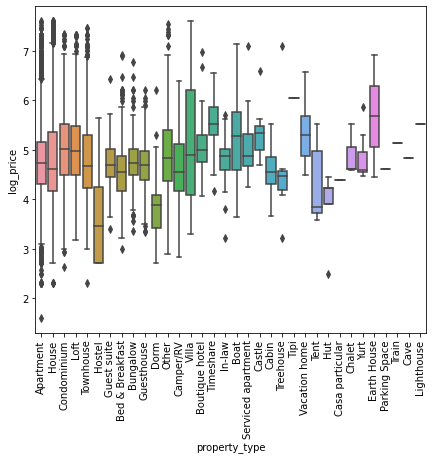

In [72]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=90)
sns.boxplot(x=train_data['property_type'],y=train_data['log_price'])

In [73]:
#checking for null values in property_type
combined_data['property_type'].isnull().sum()

0

In [74]:
# categories and their corresponding count in the variable 'property_type' 
k=combined_data['property_type'].value_counts() 
k.axes[0][0:10]

Index(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft', 'Other',
       'Guesthouse', 'Bed & Breakfast', 'Bungalow', 'Villa'],
      dtype='object')

In [75]:
#creating dummy_variables for each category having frequency more than 100  for 'property_type' 
k=combined_data['property_type'].value_counts()
for i in k.axes[0][0:10]:
    var_name='property_type'+'_'+i
    combined_data[var_name]=np.where(combined_data['property_type']==i,1,0)

In [76]:
combined_data.drop(['property_type'],axis=1,inplace=True)

In [77]:
combined_data.head(2)

id        room_type  \
0  6901257  Entire home/apt   
1  6304928  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   

   bed_type cancellation_policy  cleaning_fee city first_review  \
0  Real Bed              strict          True  NYC    6/18/2016   
1  Real Bed              strict          True  NYC     8/5/2017   

   host_has_profile_pic  host_identity_verified instant_bookable last_review  \
0                     1                       1                f   7/18/2016   
1                     1                       0                t   9/23/2017   

      neighbourhood  number_of_reviews  review_scores_rating zipcode  \
0  Brooklyn Heights                  2                 100.0   11201   
1    Hell's Kitchen                  6                  93.0   10019   

   bedrooms  beds  log_price   data  distance_to_center  host_days_active  \
0       1.0   1.0   5.010635  train            0.024928            2276.0   
1       3.0   3.0   5.129899  train            0.047400             365.0   

   property_type_Apartment  property_type_House  property_type_Condominium  \
0                        1                    0                          0   
1                        1                    0                          0   

   property_type_Townhouse  property_type_Loft  property_type_Other  \
0                        0                   0                    0   
1                        0                   0                    0   

   property_type_Guesthouse  property_type_Bed & Breakfast  \
0                         0                              0   
1                         0                              0   

   property_type_Bungalow  property_type_Villa  
0                       0                    0  
1                       0                    0

In [78]:
train_data['room_type'].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

<AxesSubplot:xlabel='room_type', ylabel='log_price'>

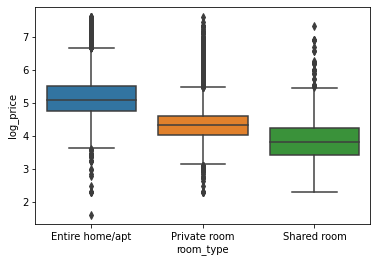

In [79]:

sns.boxplot(x=train_data['room_type'],y=train_data['log_price'])

Entire homes or apartments have relatively higher log_prices and shared_room has relatively lower log_prices

In [80]:
combined_data['room_type'].isnull().sum()

0

In [81]:
#checking the number of unique categories in 'amenities'
train_data['amenities'].nunique()

46190

As there are 46190 unique categories in 'amenities' it's not a good idea to create 46189 dummy variables.So let's drop this feature for model building

Let's see what are the main amenities involved

In [82]:
import itertools
from collections import Counter
import collections
import operator

In [83]:
#making an entire list of amenities
amenities = train_data["amenities"].tolist()#.value_counts()
l = [[tok.strip() for tok in a.replace("\"", "")[1:-1].split(",") if tok.strip() != ""] for a in amenities]
y=list(itertools.chain(*l))

In [84]:
#dictionary with amenities as keys and its count as values
count_amenities = collections.Counter(y)


In [85]:
#dictionary with amenities as keys and its count as values in decreasing order
dict(sorted(count_amenities.items(), key=operator.itemgetter(1),reverse=True))

{'Wireless Internet': 48055,
 'Kitchen': 45598,
 'Heating': 45231,
 'Essentials': 43171,
 'Smoke detector': 41545,
 'Air conditioning': 37252,
 'TV': 35313,
 'Shampoo': 33372,
 'Hangers': 33224,
 'Carbon monoxide detector': 31735,
 'Internet': 30040,
 'Laptop friendly workspace': 29531,
 'Hair dryer': 29294,
 'Washer': 29017,
 'Dryer': 28744,
 'Iron': 28134,
 'Family/kid friendly': 24837,
 'Fire extinguisher': 20659,
 'First aid kit': 18587,
 'translation missing: en.hosting_amenity_50': 17152,
 'Cable TV': 16265,
 'Free parking on premises': 15958,
 'translation missing: en.hosting_amenity_49': 13853,
 '24-hour check-in': 12798,
 'Lock on bedroom door': 12075,
 'Buzzer/wireless intercom': 11393,
 'Safety card': 7710,
 'Self Check-In': 7417,
 'Elevator': 7285,
 'Pets allowed': 6811,
 'Pets live on this property': 6537,
 'Indoor fireplace': 6305,
 'Breakfast': 5592,
 'Gym': 5040,
 'Private entrance': 4893,
 'Elevator in building': 4375,
 'Hot tub': 4282,
 'Pool': 4265,
 'Lockbox': 3851,

From above we can infer the major amenities are 'Wireless Internet', 'Kitchen', 'Heating' ,'Essentials' ,'Smoke detector' 'Air conditioning', 'TV', 'Shampoo' , 'Hangers', 'Carbon monoxide detector', 'Internet', 'Laptop friendly workspace'
'Hair dryer', 'Washer','Dryer', 'Iron', 'Family/kid friendly', 'Fire extinguisher', 'First aid kit','translation missing: en.hosting_amenity_50', 'Cable TV', 'Free parking on premises', 'translation missing: en.hosting_amenity_49', '24-hour check-in', 'Lock on bedroom door', 'Buzzer/wireless intercom', 'Safety card', 'Self Check-In', 'Elevator'

<AxesSubplot:xlabel='count'>

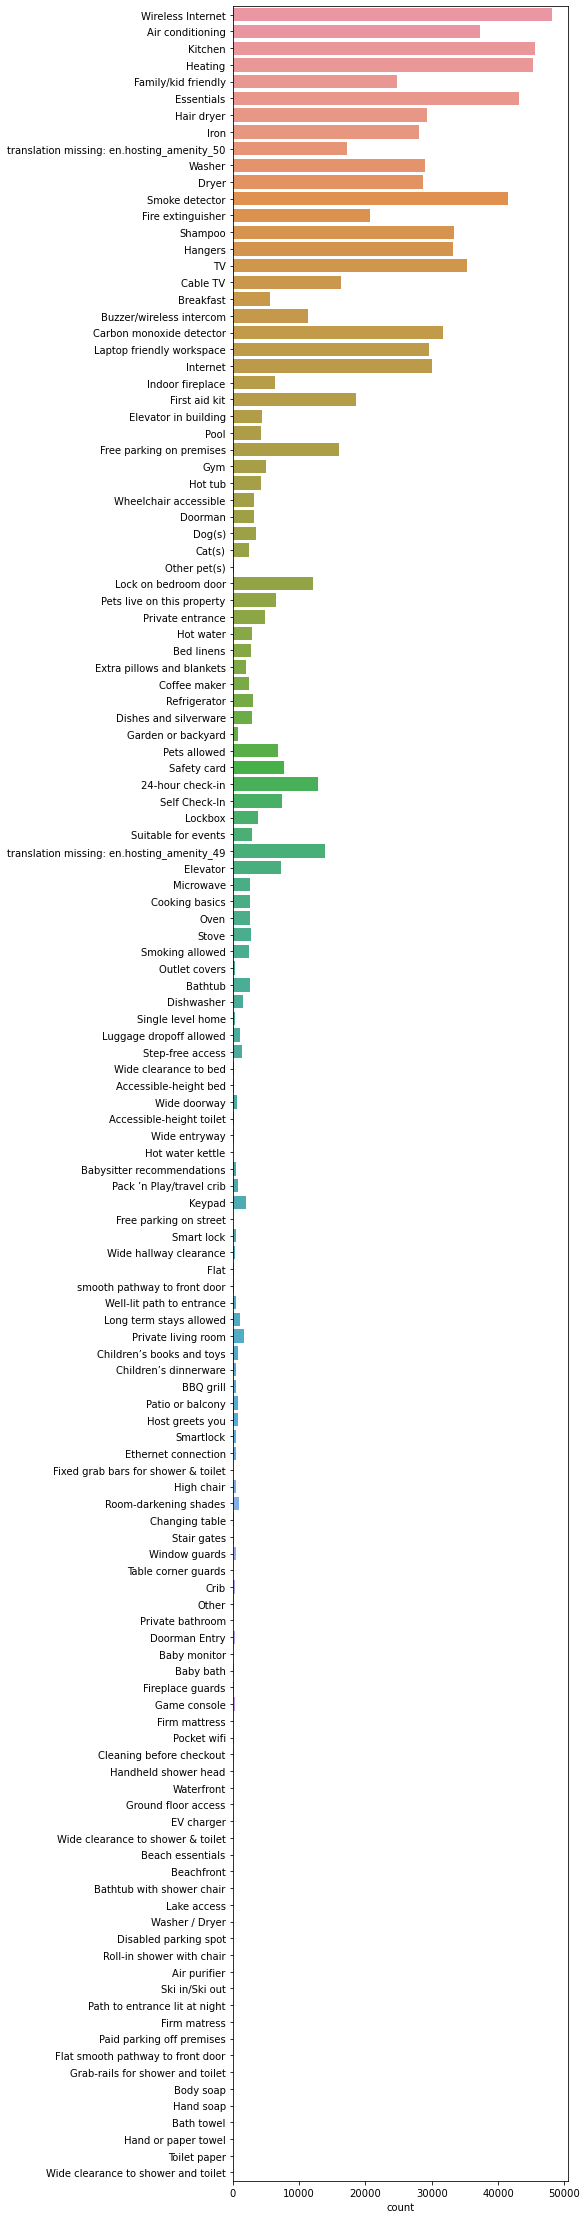

In [86]:
#countplot of amenities
plt.figure(figsize=(6, 40))
sns.countplot(y=list(itertools.chain(*l)))

In [87]:
#frequency of each category in bed_type
train_data['bed_type'].value_counts()

Real Bed         48575
Futon              518
Pull-out Sofa      403
Airbed             323
Couch              180
Name: bed_type, dtype: int64

<AxesSubplot:xlabel='bed_type', ylabel='log_price'>

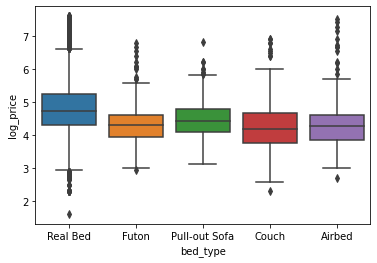

In [88]:
sns.boxplot(x=train_data['bed_type'],y=train_data['log_price'])

In [89]:
#checking for null values in bed_type
combined_data['bed_type'].isnull().sum()

0

In [90]:
#frequency of each category in cancellation_policy
train_data['cancellation_policy'].value_counts()

strict             21811
flexible           15237
moderate           12865
super_strict_30       75
super_strict_60       11
Name: cancellation_policy, dtype: int64

<AxesSubplot:xlabel='cancellation_policy', ylabel='log_price'>

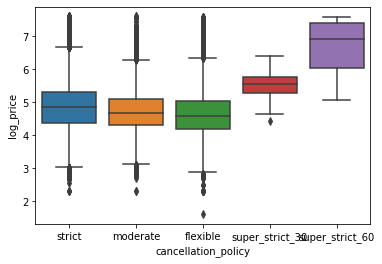

In [91]:
sns.boxplot(x=train_data['cancellation_policy'],y=train_data['log_price'])



If the cancellation_policy is super_strict_60 then the log_price values are relatively higher

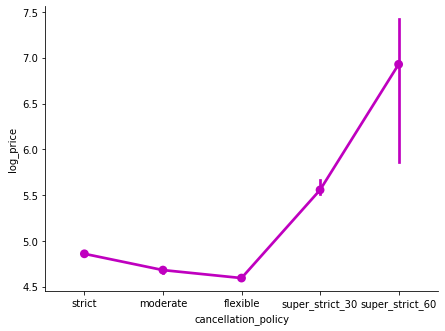

In [92]:
sns.factorplot('cancellation_policy', 'log_price', data = train_data, color = 'm', \
               estimator = np.median, size = 4.5,  aspect=1.35)

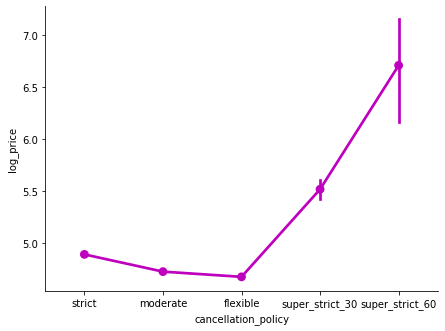

In [93]:
sns.factorplot('cancellation_policy', 'log_price', data = train_data, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [94]:

#checking for null values in cancellation_policy
combined_data['cancellation_policy'].isnull().sum()

0

In [95]:
#frequency of each category in cleaning_fee
train_data['cleaning_fee'].value_counts()

True     36627
False    13372
Name: cleaning_fee, dtype: int64

<AxesSubplot:xlabel='cleaning_fee', ylabel='log_price'>

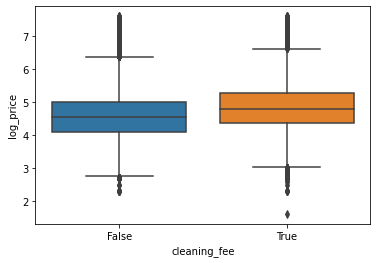

In [96]:
sns.boxplot(x=train_data['cleaning_fee'],y=train_data['log_price'])

In [97]:
#checking for null values in cleaning_fee
combined_data['cleaning_fee'].isnull().sum()

0

In [98]:
#frequency of each category in city
train_data['city'].value_counts()

NYC        21803
LA         15191
SF          4357
DC          3804
Chicago     2498
Boston      2346
Name: city, dtype: int64

<AxesSubplot:xlabel='city', ylabel='log_price'>

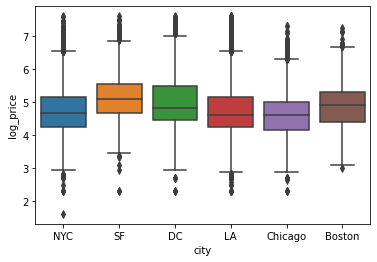

In [99]:
sns.boxplot(x=train_data['city'],y=train_data['log_price'])

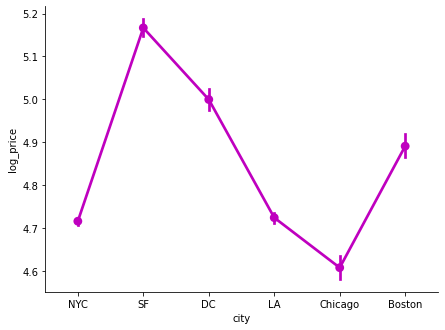

In [100]:
sns.factorplot('city', 'log_price', data = train_data, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

In [101]:
#checking for null values in city
combined_data['city'].isnull().sum()

0

In [102]:
#frequency of each category in instant_bookable
train_data['instant_bookable'].value_counts()

f    36873
t    13126
Name: instant_bookable, dtype: int64

<AxesSubplot:xlabel='instant_bookable', ylabel='log_price'>

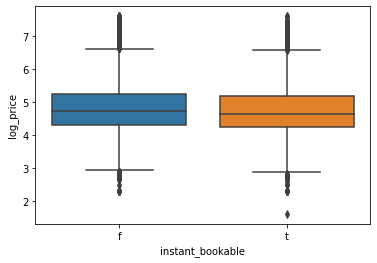

In [103]:
sns.boxplot(x=train_data['instant_bookable'],y=train_data['log_price'])

In [104]:
#checking for null values in instant_bookable
combined_data['instant_bookable'].isnull().sum()

0

In [105]:
#frequency of each category in neighbourhood
train_data['neighbourhood'].value_counts()

Williamsburg                           1909
Bedford-Stuyvesant                     1462
Bushwick                               1081
Upper West Side                         966
Mid-Wilshire                            961
Harlem                                  935
Hollywood                               918
Hell's Kitchen                          857
Venice                                  831
Upper East Side                         799
Crown Heights                           747
Astoria                                 622
Lower East Side                         577
East Village                            552
Mission District                        548
East Harlem                             532
Washington Heights                      515
Greenpoint                              506
Chelsea                                 499
West Hollywood                          493
Clinton Hill                            430
Alphabet City                           424
Hamilton Heights                

<AxesSubplot:xlabel='neighbourhood', ylabel='log_price'>

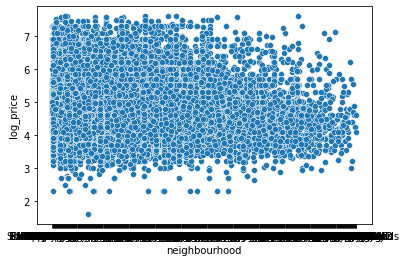

In [106]:
sns.scatterplot(train_data["neighbourhood"], train_data['log_price'])

since there are many categories in 'neighbourhood',including 'neighbourhood' in model building is not good as we end up with too many features

In [107]:
#frequency of each category in zipcode
train_data['zipcode'].value_counts()

11211                                                   1068
90291                                                    862
11221                                                    802
11206                                                    697
94110                                                    686
10002                                                    669
90046                                                    667
20002                                                    644
11216                                                    641
20009                                                    598
11238                                                    587
10009                                                    587
20001                                                    543
11222                                                    536
90028                                                    533
10003                                                    530
10025                   

Zipcode is similar to neighbourhood.It has too many categories and we exclude it in model building

In [108]:
#number of unique categories in 'first_review'
train_data['first_review'].nunique()

2423

In [109]:
#number of unique categories in 'last_review'
train_data['last_review'].nunique()

1257

first_review and last_review has too many categories and creating dummy variables result in too many features

However let's explore how these two are affecting our log_price

Let's create a variable 'duration_difference' which gives the difference between the first review and last review.

In [110]:
import datetime

In [111]:
train_data['first_review'] =  pd.to_datetime(train_data['first_review'])
train_data['last_review'] =  pd.to_datetime(train_data['last_review'])

In [112]:
train_data['first_review'].head(4)

0   2016-06-18
1   2017-08-05
2   2017-04-30
3          NaT
Name: first_review, dtype: datetime64[ns]

In [113]:
train_data['last_review'].head(4)

0   2016-07-18
1   2017-09-23
2   2017-09-14
3          NaT
Name: last_review, dtype: datetime64[ns]

In [114]:
train_data['duration_diff']=pd.to_numeric(train_data['last_review']-train_data['first_review'])

In [115]:
train_data['duration_diff']

0           2592000000000000
1           4233600000000000
2          11836800000000000
3       -9223372036854775808
4          53654400000000000
5            777600000000000
6           3628800000000000
7          10108800000000000
8          50889600000000000
9           1123200000000000
10        112060800000000000
11         43632000000000000
12      -9223372036854775808
13          6134400000000000
14          1036800000000000
15      -9223372036854775808
16          5443200000000000
17         17798400000000000
18         38275200000000000
19          4060800000000000
20         19612800000000000
21         61603200000000000
22         23846400000000000
23         12528000000000000
24      -9223372036854775808
25         15811200000000000
26                         0
27          5961600000000000
28         18748800000000000
29         44496000000000000
30                         0
31      -9223372036854775808
32        170208000000000000
33        173404800000000000
34          15

In [116]:
#dropping the log_price values where there is a null value in the day difference
#(for null values present in first_review and last_review the duration difference gave a non-negative number as difference)
train_data['log_price'].drop(index=train_data['duration_diff'].loc[train_data['duration_diff']<0].index)

0        5.010635
1        5.129899
2        4.976734
4        4.744932
5        4.442651
6        4.418841
7        4.787492
8        4.787492
9        3.583519
10       4.605170
11       5.010635
13       5.298317
14       4.955827
16       4.317488
17       4.595120
18       4.882802
19       4.595120
20       4.382027
21       3.688879
22       4.905275
23       4.007333
25       5.003946
26       4.553877
27       5.003946
28       5.192957
29       4.653960
30       4.317488
32       5.220356
33       4.488636
34       4.356709
35       4.382027
36       4.828314
37       3.912023
38       4.744932
39       4.682131
42       4.317488
43       4.997212
44       5.783825
46       5.010635
48       3.555348
49       4.007333
50       4.158883
52       6.620073
54       4.779123
55       4.744932
56       4.682131
57       4.948760
58       3.688879
59       5.857933
60       4.828314
65       4.499810
67       4.691348
68       4.779123
69       4.499810
70       4.779123
73       3

<AxesSubplot:xlabel='duration_diff', ylabel='log_price'>

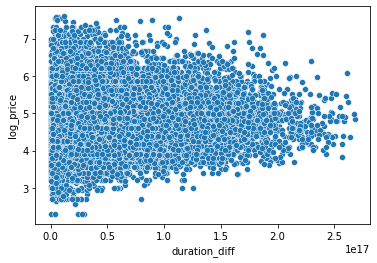

In [117]:
#scatterplot of duration_difference and log_price
sns.scatterplot(train_data['duration_diff'].loc[train_data['duration_diff']>0],train_data['log_price'].drop(index=train_data['duration_diff'].loc[train_data['duration_diff']<0].index))

for houses having higher duration between first_review and last_review the log_price values are centered around the mean

# creating dummy variables

In [118]:
for col in ['room_type','bed_type','city','cancellation_policy','cleaning_fee','instant_bookable']:
    temp=pd.get_dummies(combined_data[col],prefix=col,drop_first=True)
    combined_data=pd.concat([combined_data,temp],axis=1)

In [119]:
combined_data.head(3)

id        room_type  \
0  6901257  Entire home/apt   
1  6304928  Entire home/apt   
2  7919400  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   

   bed_type cancellation_policy  cleaning_fee city first_review  \
0  Real Bed              strict          True  NYC    6/18/2016   
1  Real Bed              strict          True  NYC     8/5/2017   
2  Real Bed            moderate          True  NYC    4/30/2017   

   host_has_profile_pic  host_identity_verified instant_bookable last_review  \
0                     1                       1                f   7/18/2016   
1                     1                       0                t   9/23/2017   
2                     1                       1                t   9/14/2017   

      neighbourhood  number_of_reviews  review_scores_rating zipcode  \
0  Brooklyn Heights                  2                 100.0   11201   
1    Hell's Kitchen                  6                  93.0   10019   
2            Harlem                 10                  92.0   10027   

   bedrooms  beds  log_price   data  distance_to_center  host_days_active  \
0       1.0   1.0   5.010635  train            0.024928            2276.0   
1       3.0   3.0   5.129899  train            0.047400             365.0   
2       1.0   3.0   4.976734  train            0.104531             602.0   

   property_type_Apartment  property_type_House  property_type_Condominium  \
0                        1                    0                          0   
1                        1                    0                          0   
2                        1                    0                          0   

   property_type_Townhouse  property_type_Loft  property_type_Other  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   

   property_type_Guesthouse  property_type_Bed & Breakfast  \
0                         0                              0   
1                         0                              0   
2                         0                              0   

   property_type_Bungalow  property_type_Villa  room_type_Private room  \
0                       0                    0                       0   
1                       0                    0                       0   
2                       0                    0                       0   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
1                      0               0               0   
2                      0               0               0   

   bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  city_DC  city_LA  \
0                       0                  1             0        0        0   
1                       0                  1             0        0        0   
2                       0                  1             0        0        0   

   city_NYC  city_SF  cancellation_policy_moderate  \
0         1        0                             0   
1         1        0                             0   
2         1        0                             1   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                           1                                    0   
1                           1                                    0   
2                           0                                    0   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                                    0                  1                   0  
1     

In [120]:
combined_data.drop(['room_type','bed_type','city','cancellation_policy','cleaning_fee','instant_bookable'],axis=1,inplace=True)

In [121]:
combined_data.head(3)

id                                          amenities  accommodates  \
0  6901257  {"Wireless Internet","Air conditioning",Kitche...             3   
1  6304928  {"Wireless Internet","Air conditioning",Kitche...             7   
2  7919400  {TV,"Cable TV","Wireless Internet","Air condit...             5   

   bathrooms first_review  host_has_profile_pic  host_identity_verified  \
0        1.0    6/18/2016                     1                       1   
1        1.0     8/5/2017                     1                       0   
2        1.0    4/30/2017                     1                       1   

  last_review     neighbourhood  number_of_reviews  review_scores_rating  \
0   7/18/2016  Brooklyn Heights                  2                 100.0   
1   9/23/2017    Hell's Kitchen                  6                  93.0   
2   9/14/2017            Harlem                 10                  92.0   

  zipcode  bedrooms  beds  log_price   data  distance_to_center  \
0   11201       1.0   1.0   5.010635  train            0.024928   
1   10019       3.0   3.0   5.129899  train            0.047400   
2   10027       1.0   3.0   4.976734  train            0.104531   

   host_days_active  property_type_Apartment  property_type_House  \
0            2276.0                        1                    0   
1             365.0                        1                    0   
2             602.0                        1                    0   

   property_type_Condominium  property_type_Townhouse  property_type_Loft  \
0                          0                        0                   0   
1                          0                        0                   0   
2                          0                        0                   0   

   property_type_Other  property_type_Guesthouse  \
0                    0                         0   
1                    0                         0   
2                    0                         0   

   property_type_Bed & Breakfast  property_type_Bungalow  property_type_Villa  \
0                              0                       0                    0   
1                              0                       0                    0   
2                              0                       0                    0   

   room_type_Private room  room_type_Shared room  bed_type_Couch  \
0                       0                      0               0   
1                       0                      0               0   
2                       0                      0               0   

   bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  \
0               0                       0                  1             0   
1               0                       0                  1             0   
2               0                       0                  1             0   

   city_DC  city_LA  city_NYC  city_SF  cancellation_policy_moderate  \
0        0        0         1        0                             0   
1        0        0         1        0                             0   
2        0        0         1        0                             1   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                           1                                    0   
1                           1                                    0   
2                           0                                    0   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                                    0                  1                   0  
1                                    0                  1                   1  
2                                    0                  1                   1

In [122]:
combined_data.drop(['amenities','first_review','last_review','neighbourhood','zipcode'],axis=1,inplace=True)

In [123]:
combined_data.head(3)

id  accommodates  bathrooms  host_has_profile_pic  \
0  6901257             3        1.0                     1   
1  6304928             7        1.0                     1   
2  7919400             5        1.0                     1   

   host_identity_verified  number_of_reviews  review_scores_rating  bedrooms  \
0                       1                  2                 100.0       1.0   
1                       0                  6                  93.0       3.0   
2                       1                 10                  92.0       1.0   

   beds  log_price   data  distance_to_center  host_days_active  \
0   1.0   5.010635  train            0.024928            2276.0   
1   3.0   5.129899  train            0.047400             365.0   
2   3.0   4.976734  train            0.104531             602.0   

   property_type_Apartment  property_type_House  property_type_Condominium  \
0                        1                    0                          0   
1                        1                    0                          0   
2                        1                    0                          0   

   property_type_Townhouse  property_type_Loft  property_type_Other  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   

   property_type_Guesthouse  property_type_Bed & Breakfast  \
0                         0                              0   
1                         0                              0   
2                         0                              0   

   property_type_Bungalow  property_type_Villa  room_type_Private room  \
0                       0                    0                       0   
1                       0                    0                       0   
2                       0                    0                       0   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
1                      0               0               0   
2                      0               0               0   

   bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  city_DC  city_LA  \
0                       0                  1             0        0        0   
1                       0                  1             0        0        0   
2                       0                  1             0        0        0   

   city_NYC  city_SF  cancellation_policy_moderate  \
0         1        0                             0   
1         1        0                             0   
2         1        0                             1   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                           1                                    0   
1                           1                                    0   
2                           0                                    0   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                                    0                  1                   0  
1                                    0                  1                   1  
2                                    0                  1                   1

The data preparation part is done.Let's separate our train data and test data

In [124]:
#subsetting train data from combined_data
airbnb_train=combined_data.loc[combined_data['data']=='train']

In [125]:
#subsetting test data from combined_data
airbnb_test=combined_data.loc[combined_data['data']=='test']

In [126]:
airbnb_train.head(3)

id  accommodates  bathrooms  host_has_profile_pic  \
0  6901257             3        1.0                     1   
1  6304928             7        1.0                     1   
2  7919400             5        1.0                     1   

   host_identity_verified  number_of_reviews  review_scores_rating  bedrooms  \
0                       1                  2                 100.0       1.0   
1                       0                  6                  93.0       3.0   
2                       1                 10                  92.0       1.0   

   beds  log_price   data  distance_to_center  host_days_active  \
0   1.0   5.010635  train            0.024928            2276.0   
1   3.0   5.129899  train            0.047400             365.0   
2   3.0   4.976734  train            0.104531             602.0   

   property_type_Apartment  property_type_House  property_type_Condominium  \
0                        1                    0                          0   
1                        1                    0                          0   
2                        1                    0                          0   

   property_type_Townhouse  property_type_Loft  property_type_Other  \
0                        0                   0                    0   
1                        0                   0                    0   
2                        0                   0                    0   

   property_type_Guesthouse  property_type_Bed & Breakfast  \
0                         0                              0   
1                         0                              0   
2                         0                              0   

   property_type_Bungalow  property_type_Villa  room_type_Private room  \
0                       0                    0                       0   
1                       0                    0                       0   
2                       0                    0                       0   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
1                      0               0               0   
2                      0               0               0   

   bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  city_DC  city_LA  \
0                       0                  1             0        0        0   
1                       0                  1             0        0        0   
2                       0                  1             0        0        0   

   city_NYC  city_SF  cancellation_policy_moderate  \
0         1        0                             0   
1         1        0                             0   
2         1        0                             1   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                           1                                    0   
1                           1                                    0   
2                           0                                    0   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                                    0                  1                   0  
1                                    0                  1                   1  
2                                    0                  1                   1

In [127]:
del airbnb_train['data']


In [128]:
del airbnb_test['data']

# Scaling the data

In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [130]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(airbnb_train.drop(['id','log_price'],axis=1)), 
                 columns=list(airbnb_train.drop(['id','log_price'],axis=1).columns))

In [131]:
# Scaling
scaler = StandardScaler()
X_test = pd.DataFrame(scaler.fit_transform(airbnb_test.drop(['id','log_price'],axis=1)), 
                 columns=list(airbnb_test.drop(['id','log_price'],axis=1).columns))

In [132]:
X_test.head(2)

accommodates  bathrooms  host_has_profile_pic  host_identity_verified  \
0     -0.540112  -0.404134              0.075594                0.698611   
1      0.399032  -0.404134              0.075594                0.698611   

   number_of_reviews  review_scores_rating  bedrooms      beds  \
0          -0.556413             -0.010355 -0.310668 -0.569048   
1           0.088880              0.867194 -0.310668 -0.569048   

   distance_to_center  host_days_active  property_type_Apartment  \
0           -0.878229         -0.470987                 0.719284   
1            1.258071         -0.591854                 0.719284   

   property_type_House  property_type_Condominium  property_type_Townhouse  \
0            -0.535484                  -0.196686                -0.152217   
1            -0.535484                  -0.196686                -0.152217   

   property_type_Loft  property_type_Other  property_type_Guesthouse  \
0           -0.131525            -0.094854                 -0.085259   
1           -0.131525            -0.094854                 -0.085259   

   property_type_Bed & Breakfast  property_type_Bungalow  property_type_Villa  \
0                       -0.07697                -0.06518            -0.049528   
1                       -0.07697                -0.06518            -0.049528   

   room_type_Private room  room_type_Shared room  bed_type_Couch  \
0                1.189929              -0.176197       -0.060524   
1               -0.840386              -0.176197       -0.060524   

   bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  \
0       -0.099209               -0.087211            0.16763     -0.230959   
1       -0.099209               -0.087211            0.16763     -0.230959   

    city_DC   city_LA  city_NYC   city_SF  cancellation_policy_moderate  \
0 -0.291139 -0.656510  1.134234 -0.307023                     -0.588222   
1 -0.291139  1.523207 -0.881652 -0.307023                      1.700037   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                    1.132610                            -0.039204   
1                   -0.882916                            -0.039204   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                            -0.015777           0.597039           -0.596272  
1                            -0.015777           0.597039           -0.596272

In [133]:
X.head(3)

accommodates  bathrooms  host_has_profile_pic  host_identity_verified  \
0     -0.072776  -0.403301              0.074639                0.700361   
1      1.774767  -0.403301              0.074639               -1.427835   
2      0.850995  -0.403301              0.074639                0.700361   

   number_of_reviews  review_scores_rating  bedrooms      beds  \
0          -0.498290              0.860275 -0.312205 -0.564810   
1          -0.393389             -0.150678  2.031279  1.023667   
2          -0.288488             -0.295100 -0.312205  1.023667   

   distance_to_center  host_days_active  property_type_Apartment  \
0           -0.884557          1.283565                 0.714108   
1           -0.883402         -1.611626                 0.714108   
2           -0.880466         -1.252567                 0.714108   

   property_type_House  property_type_Condominium  property_type_Townhouse  \
0            -0.535361                  -0.190954                 -0.15316   
1            -0.535361                  -0.190954                 -0.15316   
2            -0.535361                  -0.190954                 -0.15316   

   property_type_Loft  property_type_Other  property_type_Guesthouse  \
0           -0.130243            -0.088894                 -0.080761   
1           -0.130243            -0.088894                 -0.080761   
2           -0.130243            -0.088894                 -0.080761   

   property_type_Bed & Breakfast  property_type_Bungalow  property_type_Villa  \
0                      -0.080258               -0.072857            -0.049049   
1                      -0.080258               -0.072857            -0.049049   
2                      -0.080258               -0.072857            -0.049049   

   room_type_Private room  room_type_Shared room  bed_type_Couch  \
0               -0.839086              -0.171959       -0.060109   
1               -0.839086              -0.171959       -0.060109   
2               -0.839086              -0.171959       -0.060109   

   bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  city_Chicago  \
0       -0.102316               -0.090142           0.171218     -0.229322   
1       -0.102316               -0.090142           0.171218     -0.229322   
2       -0.102316               -0.090142           0.171218     -0.229322   

    city_DC   city_LA  city_NYC   city_SF  cancellation_policy_moderate  \
0 -0.286961 -0.660623  1.137197 -0.308967                     -0.588598   
1 -0.286961 -0.660623  1.137197 -0.308967                     -0.588598   
2 -0.286961 -0.660623  1.137197 -0.308967                      1.698951   

   cancellation_policy_strict  cancellation_policy_super_strict_30  \
0                    1.136827                            -0.038759   
1                    1.136827                            -0.038759   
2                   -0.879641                            -0.038759   

   cancellation_policy_super_strict_60  cleaning_fee_True  instant_bookable_t  
0                            -0.014834           0.604223           -0.596639  
1                            -0.014834           0.604223            1.676054  
2                            -0.014834           0.604223            1.676054

In [134]:
train_data['room_type'].value_counts()

Entire home/apt    27905
Private room       20658
Shared room         1436
Name: room_type, dtype: int64

In [135]:

y=airbnb_train['log_price']

In [136]:
from sklearn.model_selection import train_test_split
# Splitting into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=123)
#test_size=0.2 implies the 'airbnb_train'is split into two parts in 80:20 ratio


# Model Building

# XGboost

In [137]:
import xgboost
import xgboost as xgb
from xgboost import plot_importance

In [138]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_val)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_val, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_val, val_preds_xgb_reg),4))


Time taken to run: 0.1 minutes

Training MSE: 0.1296
Validation MSE: 0.1704

Training r2: 0.7467
Validation r2: 0.6769


In [139]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
city_NYC                             0.000000
bed_type_Pull-out Sofa               0.001748
host_identity_verified               0.002094
property_type_Bungalow               0.002170
cancellation_policy_moderate         0.002619
bed_type_Futon                       0.002678
host_has_profile_pic                 0.002684
property_type_Townhouse              0.002983
property_type_Guesthouse             0.003183
beds                                 0.003217
host_days_active                     0.003228
bed_type_Real Bed                    0.003280
bed_type_Couch                       0.003312
instant_bookable_t                   0.003468
property_type_Other                  0.003540
cancellation_policy_strict           0.003888
cancellation_policy_super_strict_60  0.004048
review_scores_rating                 0.004310
property_type_Apartment              0.004723
cleaning_fee_True                    0.005185
property_type_Condominium            0.005190
property_type_Bed & Breakfast        0.005464
number_of_reviews                    0.006510
cancellation_policy_super_strict_30  0.006879
city_Chicago                         0.007540
property_type_Villa                  0.008181
property_type_House                  0.008219
distance_to_center                   0.009173
property_type_Loft                   0.010509
city_LA                              0.018559
bathrooms                            0.025209
city_DC                              0.029769
accommodates                         0.031690
city_SF                              0.061247
bedrooms                             0.102398
room_type_Shared room                0.155213
room_type_Private room               0.445893

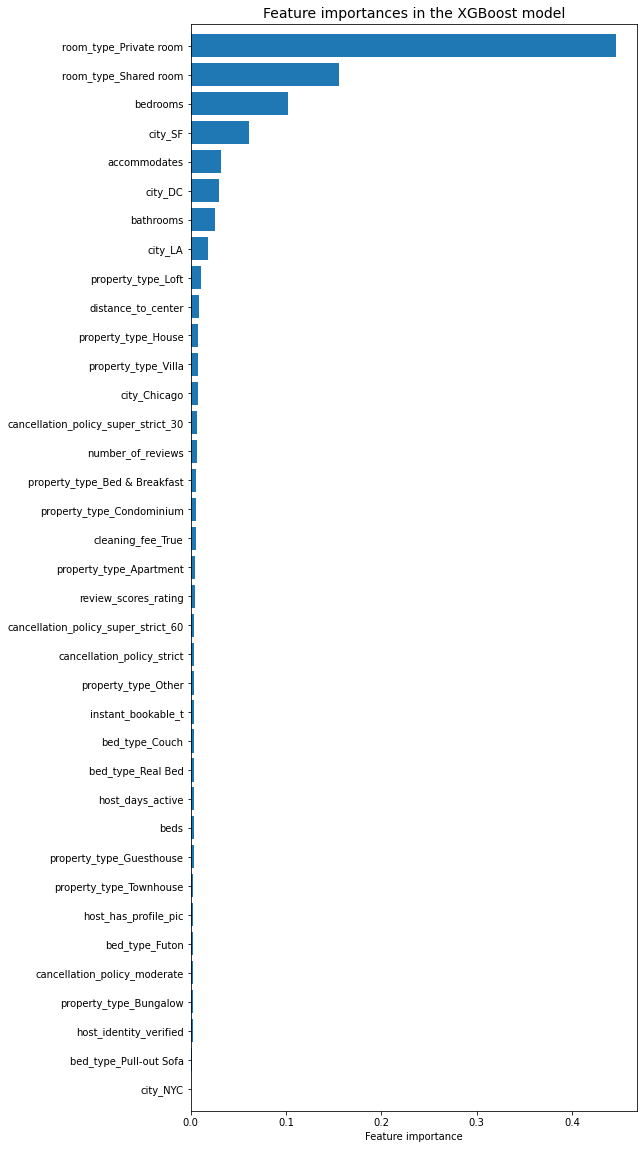

In [140]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

# Neural Network Model

In [141]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot

In [142]:
# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn2.summary())

# Visualising the neural network
#SVG(model_to_dot(nn2, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4864      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 103,937
Trainable params: 103,937
Non-trainable params: 0
_________________________________________________________________
None


In [143]:
# Training the model
nn2_start = time.time()

nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)

nn2_end = time.time()

print(f"Time taken to run: {round((nn2_end - nn2_start)/60,1)} minutes")

Epoch 1/100
150/150 [==============================] - 6s 31ms/step - loss: 4.0797 - mean_squared_error: 4.0797 - val_loss: 0.2649 - val_mean_squared_error: 0.2649
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 0.2308 - val_mean_squared_error: 0.2308
Epoch 3/100
150/150 [==============================] - 1s 7ms/step - loss: 0.2151 - mean_squared_error: 0.2151 - val_loss: 0.2352 - val_mean_squared_error: 0.2352
Epoch 4/100
150/150 [==============================] - 1s 7ms/step - loss: 0.2107 - mean_squared_error: 0.2107 - val_loss: 0.2156 - val_mean_squared_error: 0.2156
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 0.2053 - mean_squared_error: 0.2053 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 0.2047 - mean_squared_error: 0.2047 - val_loss: 0.2144 - val_mean_squared_error: 0.2144
Epoch 7/100
150/150 [

In [144]:
def nn_model_evaluation(model, nn_history, skip_epochs=0, X_train=X_train, X_test=X_val, y_train=y_train, y_test=y_val):
    """
    For a given neural network model that has already been fit, prints for the train and tests sets the MSE and r squared
    values, a line graph of the loss in each epoch, and a scatterplot of predicted vs. actual values with a line
    representing where predicted = actual values. Optionally, a value for skip_epoch can be provided, which skips that
    number of epochs in the line graph of losses (useful in cases where the loss in the first epoch is orders of magnitude
    larger than subsequent epochs). Training and test sets can also optionally be specified.
    """

    # MSE and r squared values
    y_test_pred = model.predict(X_val)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
    print("Validation r2:", round(r2_score(y_test, y_test_pred),4))
    
    # Line graph of losses
    model_results = nn_history.history
    plt.plot(list(range((skip_epochs+1),len(model_results['loss'])+1)), model_results['loss'][skip_epochs:], label='Train')
    plt.plot(list(range((skip_epochs+1),len(model_results['val_loss'])+1)), model_results['val_loss'][skip_epochs:], label='Test', color='green')
    plt.legend()
    plt.title('Training and test loss at each epoch', fontsize=14)
    plt.show()
    
    # Scatterplot of predicted vs. actual values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
    plt.subplots_adjust(top=0.93, wspace=0)
    
    ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
    ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax1.set_title('Validation set')
    ax1.set_xlabel('Actual values')
    ax1.set_ylabel('Predicted values')
    
    ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
    ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
    ax2.set_title('Train set')
    ax2.set_xlabel('Actual values')
    ax2.set_ylabel('')
    ax2.set_yticklabels(labels='')
    
    plt.show()

Training MSE: 0.1175
Validation MSE: 0.2532

Training r2: 0.7704
Validation r2: 0.5199


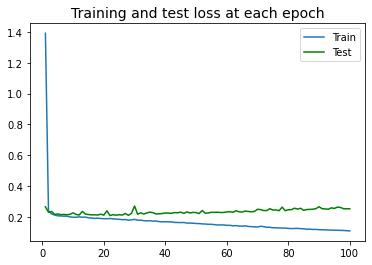

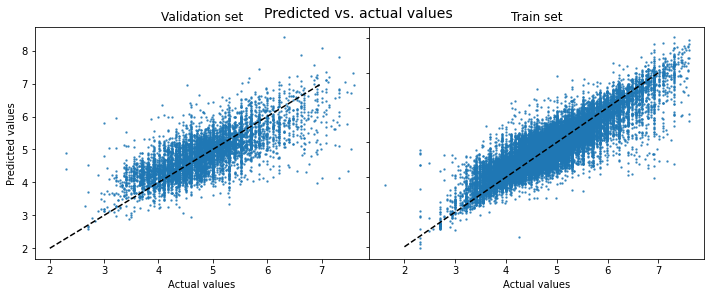

In [145]:
nn_model_evaluation(nn2,nn2_history)

# Neural Network with L1 regularization

In [146]:
# Building the model
nn3 = models.Sequential()
nn3.add(layers.Dense(128, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
nn3.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn3.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn3.summary())

# Visualising the neural network
#SVG(model_to_dot(nn3, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               4864      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 235,777
Trainable params: 235,777
Non-trainable params: 0
_________________________________________________________________
None


In [147]:
# Training the model
nn3_start = time.time()

nn3_history = nn3.fit(X_train,
                  y_train,
                  epochs=150,
                  batch_size=256,
                  validation_split = 0.1)

nn3_end = time.time()

print(f"Time taken to run: {round((nn3_end - nn3_start)/60,1)} minutes")

Epoch 1/150
150/150 [==============================] - 4s 21ms/step - loss: 45.5972 - mean_squared_error: 3.8265 - val_loss: 11.9853 - val_mean_squared_error: 0.2678
Epoch 2/150
150/150 [==============================] - 1s 9ms/step - loss: 9.2346 - mean_squared_error: 0.2482 - val_loss: 4.0937 - val_mean_squared_error: 0.2304
Epoch 3/150
150/150 [==============================] - 1s 9ms/step - loss: 3.3165 - mean_squared_error: 0.2275 - val_loss: 1.7355 - val_mean_squared_error: 0.2324
Epoch 4/150
150/150 [==============================] - 1s 10ms/step - loss: 1.4711 - mean_squared_error: 0.2267 - val_loss: 0.9414 - val_mean_squared_error: 0.2313
Epoch 5/150
150/150 [==============================] - 1s 10ms/step - loss: 0.8423 - mean_squared_error: 0.2254 - val_loss: 0.6470 - val_mean_squared_error: 0.2317
Epoch 6/150
150/150 [==============================] - 1s 9ms/step - loss: 0.6039 - mean_squared_error: 0.2249 - val_loss: 0.5263 - val_mean_squared_error: 0.2291
Epoch 7/150
150/1

Training MSE: 0.218
Validation MSE: 0.2235

Training r2: 0.5739
Validation r2: 0.5762


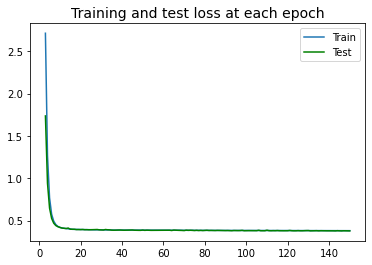

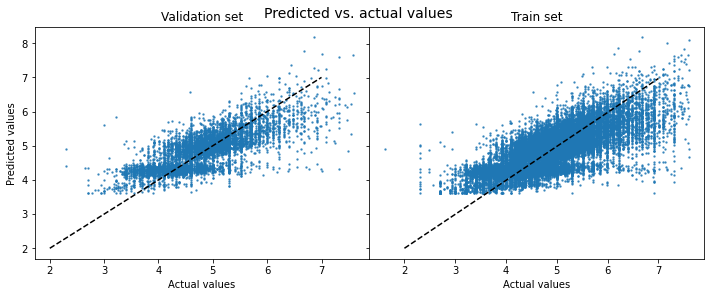

In [148]:
# Evaluating the model
nn_model_evaluation(nn3, nn3_history, skip_epochs=2)

# Neural network with dropout regularization

In [149]:
# Building the model
nn5 = models.Sequential()
nn5.add(layers.Dropout(0.5, input_shape=(X_train.shape[1],)))
nn5.add(layers.Dense(128, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(256, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(512, activation='relu'))
nn5.add(layers.Dropout(0.5))
nn5.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn5.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn5.summary())

# Visualising the neural network
#SVG(model_to_dot(nn5, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 37)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [150]:
# Training the model
nn5_start = time.time()

nn5_history = nn5.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=256,
                  validation_split = 0.1)

nn5_end = time.time()

print(f"Time taken to run: {round((nn5_end - nn5_start)/60,1)} minutes")

Epoch 1/50
150/150 [==============================] - 4s 23ms/step - loss: 5.9405 - mean_squared_error: 5.9405 - val_loss: 4.8519 - val_mean_squared_error: 4.8519
Epoch 2/50
150/150 [==============================] - 2s 12ms/step - loss: 1.4534 - mean_squared_error: 1.4534 - val_loss: 3.8691 - val_mean_squared_error: 3.8691
Epoch 3/50
150/150 [==============================] - 2s 11ms/step - loss: 0.9588 - mean_squared_error: 0.9588 - val_loss: 2.4044 - val_mean_squared_error: 2.4044
Epoch 4/50
150/150 [==============================] - 2s 11ms/step - loss: 0.7359 - mean_squared_error: 0.7359 - val_loss: 1.2308 - val_mean_squared_error: 1.2308
Epoch 5/50
150/150 [==============================] - 2s 11ms/step - loss: 0.5949 - mean_squared_error: 0.5949 - val_loss: 0.7260 - val_mean_squared_error: 0.7260
Epoch 6/50
150/150 [==============================] - 2s 11ms/step - loss: 0.5289 - mean_squared_error: 0.5289 - val_loss: 0.6098 - val_mean_squared_error: 0.6098
Epoch 7/50
150/150 [==

Training MSE: 0.2702
Validation MSE: 0.2763

Training r2: 0.4718
Validation r2: 0.476


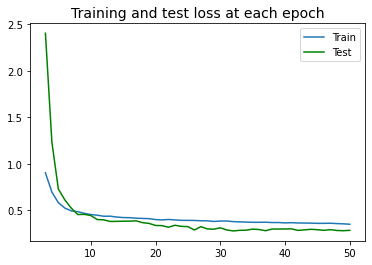

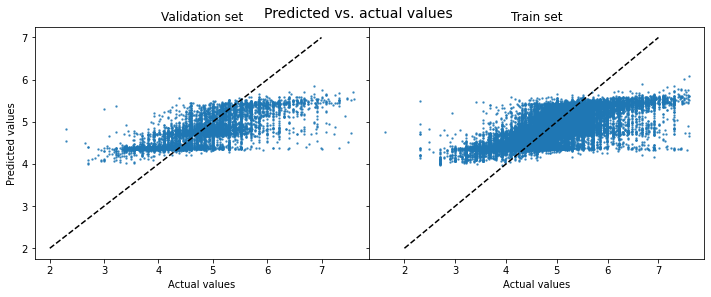

In [151]:
nn_model_evaluation(nn5, nn5_history, skip_epochs=2)

Overall, the XGBoost model  is the preferred model, which performs better than neural network models and is less computationally expensive.

# Making Predictions

In [152]:
Test_ID = airbnb_test['id']
airbnb_test.set_index('id', inplace=True)

In [153]:
y = xgb_reg.predict(X_test)

In [154]:
submissionXGB = pd.DataFrame(np.column_stack([Test_ID, y]), columns = ['id','log_price'])
submissionXGB.to_csv("Airbnb_submission_XGB.csv", index = False)

In [155]:
y2 = nn3.predict(X_test)

In [157]:
submissionNN3 = pd.DataFrame(np.column_stack([Test_ID, y2]), columns = ['id','log_price'])
submissionNN3.to_csv("Airbnb_submission_neuralnet.csv", index = False)